### Problem Statement
To develop a ML model to predict the price of houses by taking the house details as input and house price as output.

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Processed_Housing_data.csv')
df = df[['SaleDate','LandUse','SoldAsVacant','Acreage','TaxDistrict','LandValue','BuildingValue','TotalValue','YearBuilt','Bedrooms','FullBath','HalfBath','SalePrice']]
df.head()

,SaleDate,LandUse,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SalePrice
0,8/21/2015,SINGLE FAMILY,No,0.17,URBAN SERVICES DISTRICT,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0,105000.0
1,12/15/2015,SINGLE FAMILY,No,0.18,URBAN SERVICES DISTRICT,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0,120000.0
2,1/9/2015,SINGLE FAMILY,No,0.14,URBAN SERVICES DISTRICT,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0,407500.0
3,5/25/2016,SINGLE FAMILY,No,0.95,GENERAL SERVICES DISTRICT,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0,235000.0
4,12/28/2015,DUPLEX,No,0.09,GENERAL SERVICES DISTRICT,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0,140000.0


In [9]:
df.isnull().sum()

SaleDate         0
LandUse          0
SoldAsVacant     0
Acreage          0
TaxDistrict      0
LandValue        0
BuildingValue    0
TotalValue       0
YearBuilt        0
Bedrooms         0
FullBath         0
HalfBath         0
SalePrice        0
dtype: int64

In [3]:
df.shape

(23705, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SaleDate       23705 non-null  object 
 1   LandUse        23705 non-null  object 
 2   SoldAsVacant   23705 non-null  object 
 3   Acreage        23705 non-null  float64
 4   TaxDistrict    23705 non-null  object 
 5   LandValue      23705 non-null  float64
 6   BuildingValue  23705 non-null  float64
 7   TotalValue     23705 non-null  float64
 8   YearBuilt      23705 non-null  float64
 9   Bedrooms       23705 non-null  float64
 10  FullBath       23705 non-null  float64
 11  HalfBath       23705 non-null  float64
 12  SalePrice      23705 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.4+ MB


### Preprocessing Data for Machine Learning

In [5]:
data = df.copy()

#### Convert categorical variables to numerical

In [6]:
data['SaleDate'] = pd.to_datetime(data['SaleDate'])
data['LandUse'] = data['LandUse'].astype('category').cat.codes
data['SoldAsVacant'] = data['SoldAsVacant'].astype('category').cat.codes

data['TaxDistrict'] = data['TaxDistrict'].astype('category').cat.codes

In [7]:
data.head()

,SaleDate,LandUse,SoldAsVacant,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,SalePrice
0,2015-08-21,18,1,0.17,6,18200.0,64600.0,82800.0,1928.0,2.0,1.0,0.0,105000.0
1,2015-12-15,18,1,0.18,6,13000.0,107800.0,120800.0,1975.0,2.0,1.0,1.0,120000.0
2,2015-01-09,18,1,0.14,6,80000.0,226600.0,306600.0,2014.0,3.0,3.0,1.0,407500.0
3,2016-05-25,18,1,0.95,5,50000.0,157400.0,207400.0,1988.0,3.0,2.0,0.0,235000.0
4,2015-12-28,6,1,0.09,5,17000.0,64100.0,81100.0,1933.0,6.0,2.0,0.0,140000.0


### Correlation between variables

<AxesSubplot:>

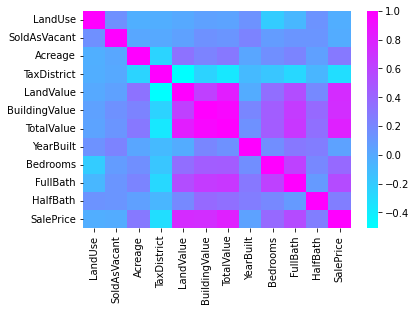

In [8]:
sns.heatmap(data.corr(), annot=False, cmap='cool')

<AxesSubplot:>

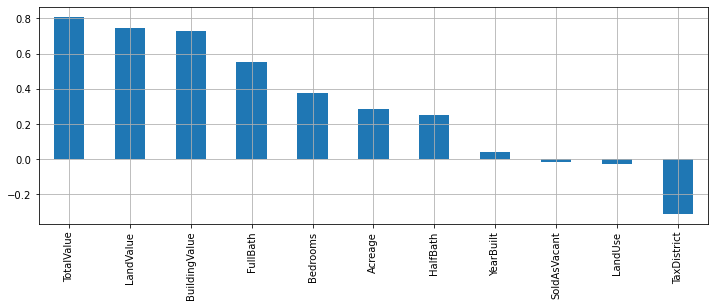

In [9]:
target_col = 'SalePrice'
data.corr()[target_col].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)

In [10]:
corr_df = pd.DataFrame(data.corr()[target_col].sort_values(ascending=False)[1:])

corr_df.columns=['Corr']

In [11]:
corr_df

,Corr
TotalValue,0.810642
LandValue,0.744294
BuildingValue,0.730894
FullBath,0.552712
Bedrooms,0.376122
Acreage,0.285890
HalfBath,0.253800
YearBuilt,0.038871
SoldAsVacant,-0.017460
LandUse,-0.027323


## Select Feature and Target set

In [12]:
# X = Feature
#  y= Target

X = data.iloc[:,1:-1]
Y = data[target_col]

In [13]:
X.shape,Y.shape

((23705, 11), (23705,))

In [14]:
Y.head()

0    105000.0
1    120000.0
2    407500.0
3    235000.0
4    140000.0
Name: SalePrice, dtype: float64

### Divide the dataset into train and test set

In [15]:
x_train, x_test ,y_train,y_test = train_test_split(X,Y , test_size=0.25,random_state=365)

In [16]:
x_train.shape, y_train.shape 

((17778, 11), (17778,))

In [17]:
x_test.shape , y_test.shape

((5927, 11), (5927,))

### Normalize the data

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

## First ML Regression model
### LinearRegresion

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [20]:
# Train the model

lr.fit(x_train_scaled,y_train)

LinearRegression()

### Predict the target

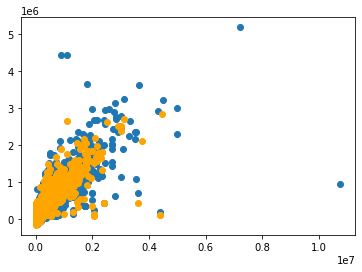

In [23]:
yp_train = lr.predict(x_train_scaled)

plt.scatter(y_train,yp_train)
plt.scatter(y_test,yp_test,color='orange')

In [22]:
yp_test = lr.predict(x_test_scaled)

In [24]:
score = lr.score(x_test_scaled,y_test)
print(f'The score of the model is {round(score*100)}%')

The score of the model is 70%


In [25]:
print(score)

0.7039586687597137


#### Improving Model Performance

<AxesSubplot:ylabel='Density'>

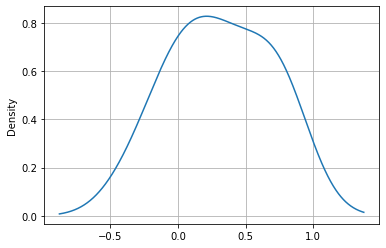

In [27]:
# Clearing outliers
data.corr()[target_col].sort_values(ascending=False)[1:].plot(kind='kde', grid=True)
#plt.axvline(x=0.03, color='red')

In [28]:
input_col = corr_df[abs(corr_df['Corr']>0.03) & (corr_df['Corr']<0.8)].index
input_col

Index(['LandValue', 'BuildingValue', 'FullBath', 'Bedrooms', 'Acreage',
       'HalfBath', 'YearBuilt'],
      dtype='object')

In [29]:
x = data[input_col]
y = data[target_col]

In [30]:
x.shape,y.shape

((23705, 7), (23705,))

In [31]:
# Split the dataset into train and test sets
xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state=365)

In [32]:
# train the model
LR = LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [33]:
# Test the model
pred = LR.predict(xtest)

In [34]:
print('Score:',LR.score(xtest,ytest))

Score: 0.6889951504408935


## Second ML Regression Model
### RandomForest

In [61]:
clf = RandomForestRegressor(random_state=365,ccp_alpha=0.002)

In [62]:
# Train model
clf.fit(x_train_scaled,y_train)

RandomForestRegressor(ccp_alpha=0.002, random_state=365)

In [63]:
target_pred = clf.predict(x_test_scaled)

In [65]:
clf.score(x_test_scaled,y_test)

0.7015099299788548